# 04 — Compare Models (Across Runs)

Load CSVs or reuse in-memory results to compare Accuracy, Macro F1, and Weighted F1.

In [5]:
# ============================
# CELL 1 — Load Results from 02 & 03 Notebooks
# ============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load both result tables
unbalanced_results = pd.read_csv('../results/model_results_unbalanced.csv')  # from 02.ipynb
balanced_results   = pd.read_csv('../results/model_results_balanced.csv')    # from 03.ipynb

# Add source labels
unbalanced_results["Dataset"] = "Unbalanced"
balanced_results["Dataset"]   = "Balanced"

# Merge for joint visualization
combined_results = pd.concat([unbalanced_results, balanced_results], ignore_index=True)
display(combined_results)

,Model,Accuracy,Macro F1,Weighted F1,Dataset
0,KNN (k=1),0.473614,0.149256,0.473406,Unbalanced
1,Random Forest (n=300),0.614872,0.154434,0.581684,Unbalanced
2,Gradient Boosting,0.620203,0.143291,0.584781,Unbalanced
3,XGBoost,0.730277,0.196341,0.705588,Unbalanced
4,KNN (k=1),0.648000,0.639489,0.636170,Balanced
5,Random Forest (n=300),0.842000,0.836634,0.835611,Balanced
6,Gradient Boosting,0.812667,0.803380,0.802117,Balanced
7,XGBoost,0.944667,0.943603,0.943215,Balanced


## Cell 2: Compare Bar Graphs(All 4 models x 2 Data Sets)

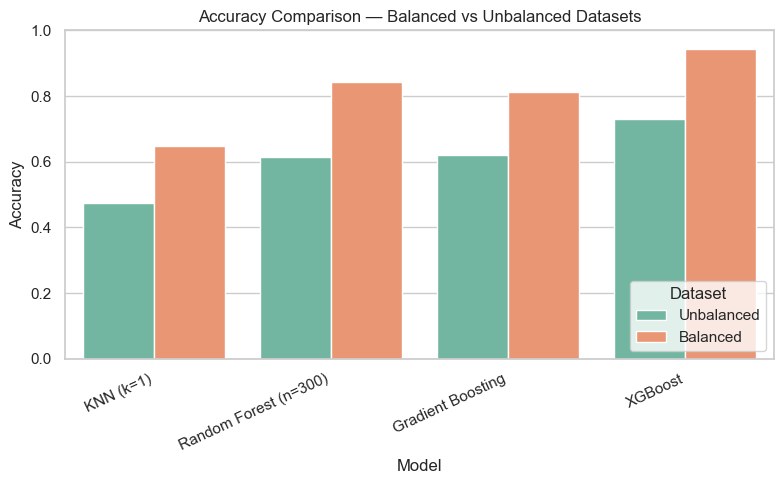

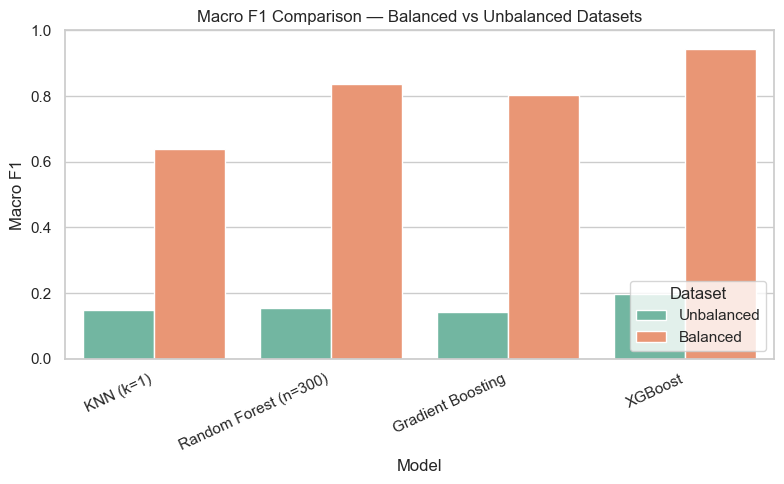

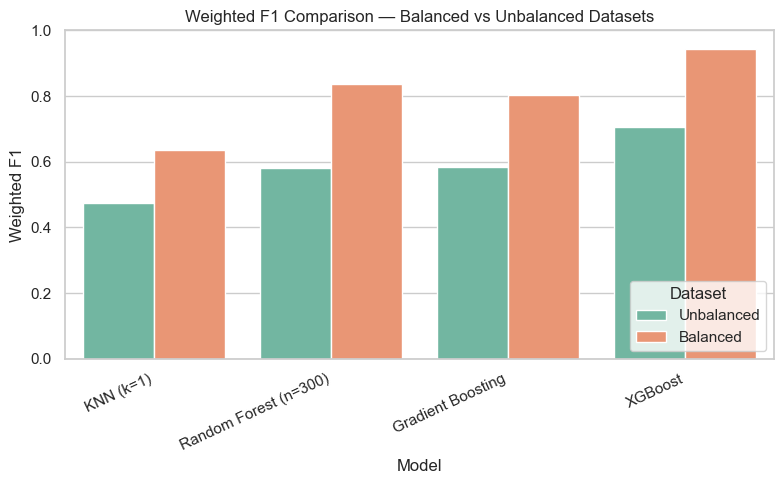


Cell 2 complete — comparison bar graphs generated for all 4 models.



In [7]:
# ============================
# CELL 2 — Compare Balanced vs Unbalanced Models
# ============================

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
metrics = ["Accuracy", "Macro F1", "Weighted F1"]

for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.barplot(
        data=combined_results,
        x="Model",
        y=metric,
        hue="Dataset",           # Balanced vs Unbalanced
        palette="Set2"
    )
    plt.title(f"{metric} Comparison — Balanced vs Unbalanced Datasets")
    plt.ylabel(metric)
    plt.ylim(0, 1)
    plt.xlabel("Model")
    plt.xticks(rotation=25, ha='right')
    plt.legend(title="Dataset", loc="lower right")
    plt.tight_layout()
    plt.show()

print("\nCell 2 complete — comparison bar graphs generated for all 4 models.\n")

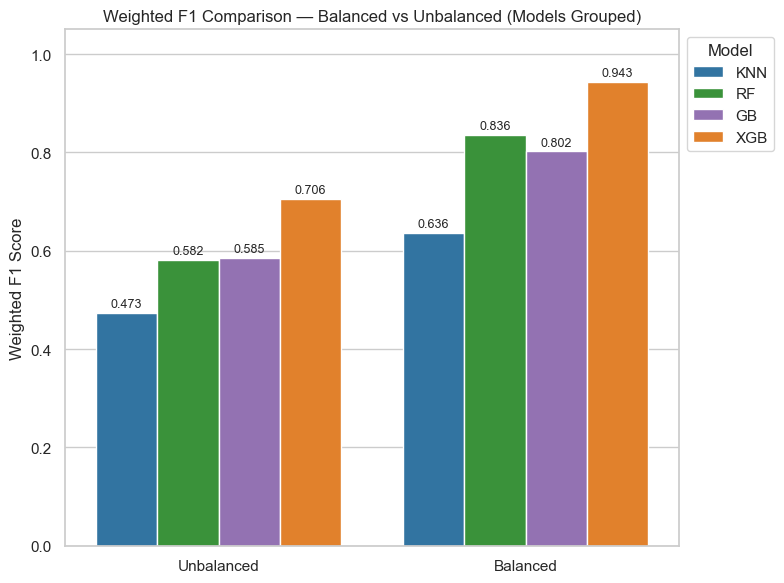

In [15]:
# ============================
# CELL 3 — Grouped by Dataset + Labels on Bars
# ============================

import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# Ensure numeric columns
for col in ["Accuracy", "Macro F1", "Weighted F1"]:
    combined_results[col] = pd.to_numeric(combined_results[col], errors="coerce")

# Clean model names
def clean_model(name):
    return re.sub(r"\s*\(.*?\)", "", str(name)).strip()

combined_results["Model_Clean"] = combined_results["Model"].apply(clean_model)

# Keep expected models only
model_order = ["KNN", "Random Forest", "Gradient Boosting", "XGBoost"]
combined_results = combined_results[combined_results["Model_Clean"].isin(model_order)].copy()
combined_results["Weighted F1"] = combined_results["Weighted F1"].fillna(0.0)

# Shorten model names for label text
short_map = {
    "KNN": "KNN",
    "Random Forest": "RF",
    "Gradient Boosting": "GB",
    "XGBoost": "XGB"
}
combined_results["Short"] = combined_results["Model_Clean"].map(short_map)

# Two-color palette
palette_map = {"Unbalanced": "#1f77b4", "Balanced": "#ff7f0e"}

plt.figure(figsize=(8,6))
ax = sns.barplot(
    data=combined_results,
    x="Dataset",           # group only by dataset
    y="Weighted F1",
    hue="Short",           # each model gets a separate bar in each group
    palette=["#1f77b4","#2ca02c","#9467bd","#ff7f0e"],  # blue, green, purple, orange
)

# Bar labels on top
for container in ax.containers:
    ax.bar_label(container, fmt="%.3f", label_type="edge", padding=2, fontsize=9)

plt.title("Weighted F1 Comparison — Balanced vs Unbalanced (Models Grouped)")
plt.ylabel("Weighted F1 Score")
plt.xlabel("")
plt.ylim(0, 1.05)
plt.legend(title="Model", loc="upper left", bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()